In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame

In [2]:
import os
os.getcwd()

'C:\\Users\\ld646'

In [3]:
data1=pd.read_excel("admission.xlsx")

In [4]:
data1.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
data1.isnull ().sum ()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
data1.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
data1.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [8]:
corr = data1.corr()

<AxesSubplot:>

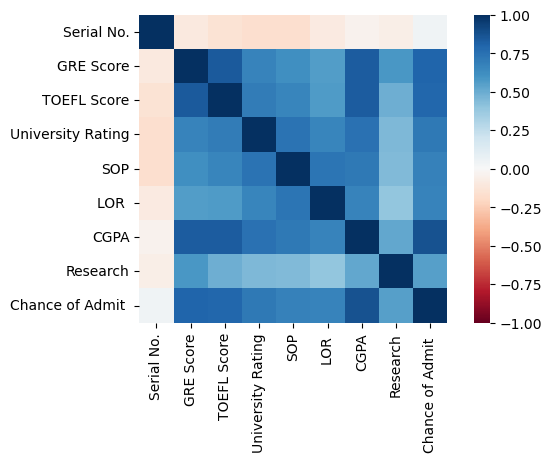

In [9]:
%matplotlib inline

import seaborn as sns
plt.figure (figsize=(7,4))

sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap="RdBu")

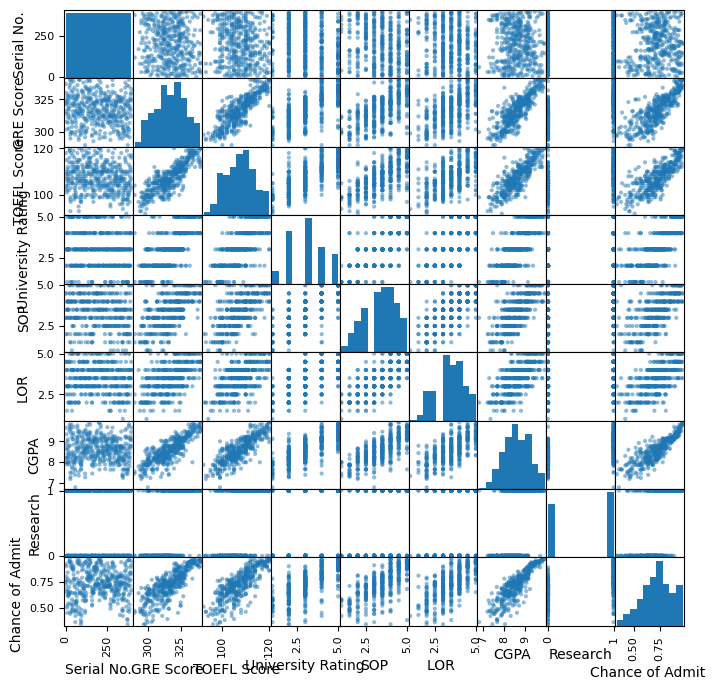

In [10]:
from pandas.plotting import scatter_matrix

a = scatter_matrix(data1, figsize=(8, 8))

<AxesSubplot:xlabel='CGPA', ylabel='GRE Score'>

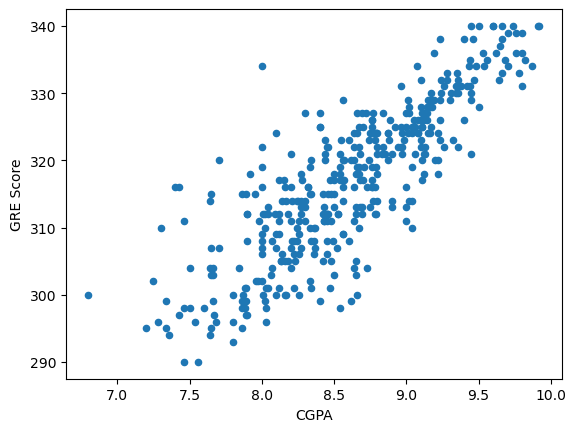

In [11]:
data1.plot.scatter("CGPA", "GRE Score")

<AxesSubplot:xlabel='Chance of Admit ', ylabel='CGPA'>

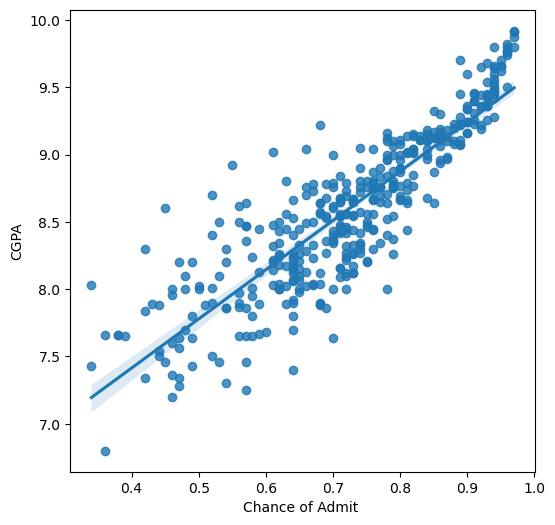

In [12]:
plt.figure(figsize=(6,6))
sns.regplot(data= data1, y = 'CGPA', x = 'Chance of Admit ')

In [13]:
admit_chance = data1.corr()['Chance of Admit ']
admit_chance

Serial No.           0.042336
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
CGPA                 0.873289
Research             0.553202
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

In [14]:
admit_chance = pd.DataFrame(admit_chance)
admit_chance

,Chance of Admit
Serial No.,0.042336
GRE Score,0.802610
TOEFL Score,0.791594
University Rating,0.711250
SOP,0.675732
LOR,0.669889
CGPA,0.873289
Research,0.553202
Chance of Admit,1.000000


Here the column ‘Serial No.’ isn’t necessary for admission prediction so we drop it out of the data.

In [15]:
admit_chance = admit_chance.drop(['Chance of Admit ','Serial No.'])
admit_chance

,Chance of Admit
GRE Score,0.802610
TOEFL Score,0.791594
University Rating,0.711250
SOP,0.675732
LOR,0.669889
CGPA,0.873289
Research,0.553202


<AxesSubplot:>

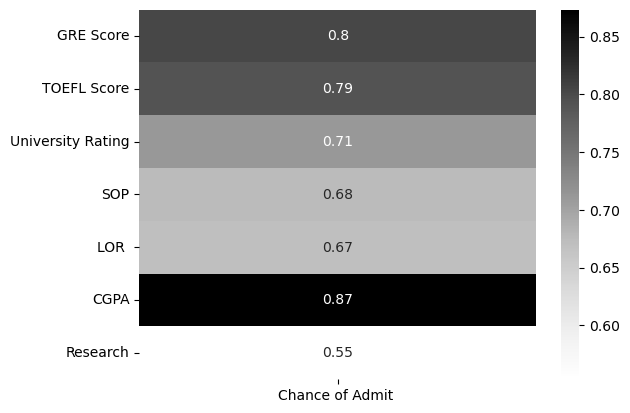

In [16]:
sns.heatmap(admit_chance, annot = True, cmap = 'Greys')

Find those students who's GRE Score is Greater than 300 and university rating is 1 & CGPA is greater then equal to 8.0.

In [17]:
a1=data1.loc[(data1["GRE Score"]>=300) & (data1["CGPA"]>=8.0)]

In [18]:
a1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


Find those students who's TOEFL Score is Less than 100 and SOP Score is Less than 4.0 as well as Research type is 0.

b1=dataset.loc[(dataset["TOEFL Score"]<100) & (dataset["SOP"]<4.0) & (dataset["Research"]==0)]

In [19]:
b1=data1.loc[(data1["GRE Score"]>=330) & (data1["CGPA"]>=9.7)]

In [20]:
b1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
23,24,334,119,5,5.0,4.5,9.70,1,0.95
24,25,336,119,5,4.0,3.5,9.80,1,0.97
34,35,331,112,5,4.0,5.0,9.80,1,0.94
47,48,339,119,5,4.5,4.0,9.70,0,0.89
71,72,336,112,5,5.0,5.0,9.76,1,0.96
130,131,339,114,5,4.0,4.5,9.76,1,0.96
143,144,340,120,4,4.5,4.0,9.92,1,0.97
148,149,339,116,4,4.0,3.5,9.80,1,0.96
202,203,340,120,5,4.5,4.5,9.91,1,0.97
203,204,334,120,5,4.0,5.0,9.87,1,0.97


In [21]:
x = data1[['TOEFL Score','CGPA','University Rating','GRE Score','Research']]
y = data1['Chance of Admit ']

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
adm_predict = LinearRegression()

In [24]:
x = data1[['TOEFL Score','CGPA','University Rating','GRE Score','Research']]
y = data1['Chance of Admit ']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() 
lm.fit(X_train,y_train)
LinearRegression()
y_pred = lm.predict(X_test)
lm.score(x,y)

0.7944607781689828

In [27]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)
mae

0.045337363518781884

In [28]:
from sklearn.metrics import mean_squared_error, r2_score 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
from sklearn.linear_model import LinearRegression
lm = LinearRegression() 
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
lm.score(x,y)

0.7933062766705139

In [30]:
print(lm.score(X_test, y_test))
print(r2_score(y_test, y_pred))

0.8109151753390067
0.8109151753390067


In [31]:
from sklearn import metrics

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [33]:
x=data1[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]
y=data1[['Chance of Admit ']]

In [34]:
model=LinearRegression()

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

In [36]:
x_train.shape

(280, 7)

In [37]:
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
105,316,110,3,4.0,4.5,8.78,1
228,318,112,3,4.0,3.5,8.67,0
173,323,113,4,4.0,4.5,9.23,1
226,306,110,2,3.5,4.0,8.45,0
205,295,99,2,2.5,3.0,7.65,0


In [38]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
Ypredic=model.predict(x_test)

In [40]:
df=y_test.copy()
df['Predicted Values']=Ypredic
df.columns=['Actual Values','Predicted Values']
df

,Actual Values,Predicted Values
276,0.89,0.900668
274,0.58,0.562491
164,0.81,0.823747
393,0.77,0.691019
136,0.76,0.664477
...,...,...
153,0.79,0.733148
298,0.90,0.864971
104,0.74,0.802088
83,0.92,0.891690


In [41]:
r2_score(y_test,Ypredic)

0.8044007811651499

In [42]:
model.score(x_test,y_test)

0.8044007811651499

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf= RandomForestRegressor()
rf.fit (x_train, y_train)

C:\Users\ld646\AppData\Local\Temp\ipykernel_9808\2454850755.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit (x_train, y_train)


RandomForestRegressor()

In [45]:
y_prdict2= rf.predict(x_test)

In [46]:
from sklearn import metrics

In [47]:
score= metrics.r2_score(y_test, y_prdict2)

In [48]:
score

0.7240835890536252

In [49]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_prdict2, y_test)
mae

0.04888333333333332